In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [24]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0],28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical (y_test)

In [25]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
modelpath = "./MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [28]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.07783, saving model to ./MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.07783 to 0.06132, saving model to ./MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.06132 to 0.04980, saving model to ./MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.04980 to 0.04721, saving model to ./MNIST_CNN.hdf5

Epoch 5: val_loss improved from 0.04721 to 0.04414, saving model to ./MNIST_CNN.hdf5

Epoch 6: val_loss improved from 0.04414 to 0.04023, saving model to ./MNIST_CNN.hdf5

Epoch 7: val_loss did not improve from 0.04023

Epoch 8: val_loss did not improve from 0.04023

Epoch 9: val_loss improved from 0.04023 to 0.03950, saving model to ./MNIST_CNN.hdf5

Epoch 10: val_loss improved from 0.03950 to 0.03768, saving model to ./MNIST_CNN.hdf5

Epoch 11: val_loss did not improve from 0.03768

Epoch 12: val_loss did not improve from 0.03768

Epoch 13: val_loss did not improve from 0.03768

Epoch 14: val_loss did not improve from 0.03768

Epoch 15: val_loss did

In [29]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.0329 - accuracy: 0.9917

 Test Accuracy: 0.9917


In [30]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

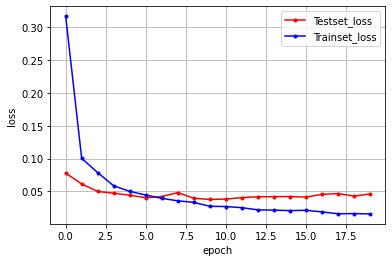

In [33]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()